step :  0 
 [array([[ 0.18563931,  0.87575711]]), array([[ 1.7184374,  1.2691349]]), array([[ 1.33070254,  0.32256578]]), array([[ 0.28884944,  0.08994069]]), array([[ 1.86562328,  0.20784752]])]
step :  1 
 [array([[ 0.404262  ,  1.85156658]]), array([[ 2.69279425,  1.4941432 ]]), array([[ 2.27708404,  0.64561694]]), array([[ 0.32899362,  1.08913458]]), array([[ 2.4685574 ,  1.00563849]])]
step :  2 
 [array([[ 0.62288468,  2.82737605]]), array([[ 3.66715109,  1.7191515 ]]), array([[ 3.22346555,  0.9686681 ]]), array([[ 0.3691378 ,  2.08832848]]), array([[ 3.07149153,  1.80342947]])]
step :  3 
 [array([[ 0.84150737,  3.80318552]]), array([[ 4.64150794,  1.9441598 ]]), array([[ 4.16984705,  1.29171926]]), array([[ 0.40928198,  3.08752238]]), array([[ 3.67442565,  2.60122044]])]
step :  4 
 [array([[ 1.06013006,  4.77899499]]), array([[ 5.61586479,  2.1691681 ]]), array([[ 5.11622855,  1.61477041]]), array([[ 0.44942616,  4.08671628]]), array([[ 4.27735978,  3.39901142]])]
step :  5 
 

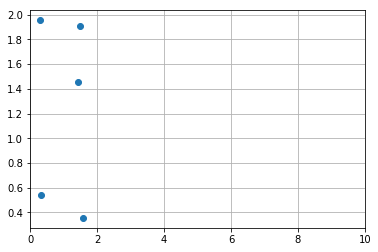

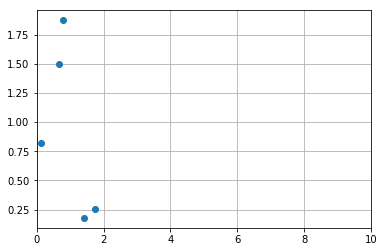

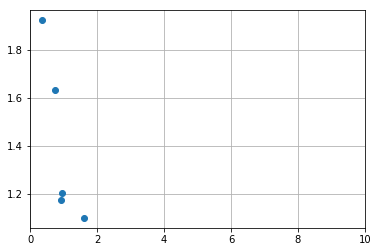

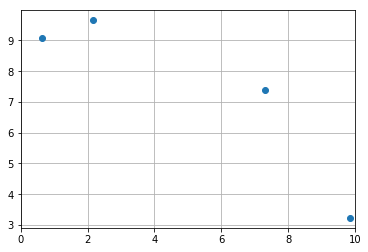

In [57]:
import numpy as np
import time

class Agent: 
    def __init__(self, pos, velo):
        self.pos = pos
        self.velo = velo
        
agents = []

w = 0.5
        
def initialize():
    for i in range(5):
        agents.append(Agent(2*np.random.random((1,2)),2*np.random.random((1,2))))
    

    
def find_nearest_neighbor(aj): 
    distances = [np.linalg.norm(aj.velo - ai.velo) for ai in agents_tmp]
    distances[distances.index(0.0)] = max(distances)
    return(agents[distances.index(min(distances))])
    
initialize()
simulation_steps = 10
plotting = DynamicUpdate()
plotting.on_launch()

for i in range(simulation_steps):
    positions = [agent.pos for agent in agents]
    x = [pos[0][0] for pos in positions]
    y = [pos[0][1] for pos in positions]
    plotting.on_running(x, y)
    animation.set_ydata(y)
    animation.set_xdata(x)
    fig.canvas.draw()


    agents_tmp = agents.copy()
    print("step : ", i, "\n", [agent.pos for agent in agents])
    for aj in agents:
        ai = find_nearest_neighbor(aj)
        aj.velo += w*aj.velo
        aj.velo = (aj.velo / np.linalg.norm(aj.velo))
        aj.pos += aj.velo
plt.show()

In [55]:
class DynamicUpdate():
    #Suppose we know the x range
    min_x = 0
    max_x = 10

    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[], 'o')
        #Autoscale on unknown axis and known lims on the other
        self.ax.set_autoscaley_on(True)
        self.ax.set_xlim(self.min_x, self.max_x)
        #Other stuff
        self.ax.grid()

    def on_running(self, xdata, ydata):
        #Update data (with the new _and_ the old points)
        self.lines.set_xdata(xdata)
        self.lines.set_ydata(ydata)
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        #self.figure.canvas.flush_events()
        time.sleep(1)


1.99394324894
1.18935852435


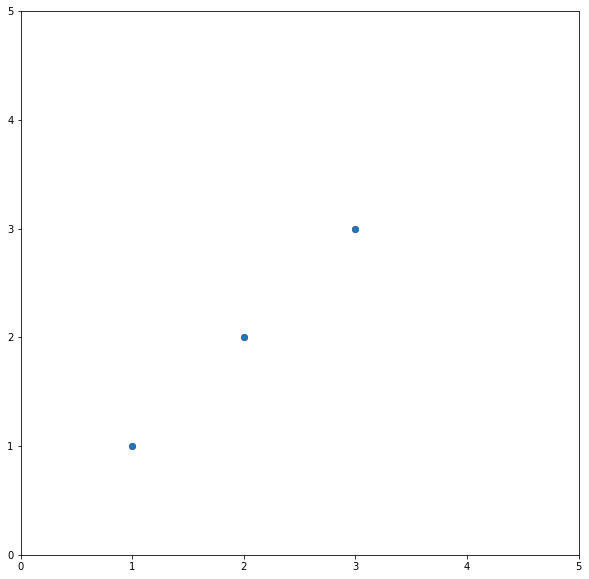

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Agent:
    def __init__(self, pos, velo):
        self.pos = pos
        self.velo_temp = velo
        self.velo = velo

x_list = []
y_list =[]
agents = []
w = 0.5
N = 5

def initialize():

    for i in range(N):
        agents.append(Agent(2*np.random.random(2),2*np.random.random(2)))

def find_nearest_neighbor(aj):
    distances = [np.linalg.norm(aj.velo - ai.velo) for ai in agents]
    distances[distances.index(0.0)] = max(distances)
    return(agents[distances.index(min(distances))])

def get_x_pos():
    ret_list = []
    for aj in agents:
        ret_list.append(aj.pos[0])
    return ret_list

def get_y_pos():
    ret_list = []
    for aj in agents:
        ret_list.append(aj.pos[1])
    return ret_list

initialize()
print(find_nearest_neighbor(agents[0]))

test_x = [[1,2,3],[2,3,4],[3,4,5]]
test_y = [[1,2,3],[2,3,4],[3,4,5]]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
points = ax.scatter(test_x[0], test_y[0], c='red')

def animate(i):
    ax.clf()
    points = ax.scatter(test_x[i], test_y[i], c='red')
    
    return points
    # use i-th elements from data

print(agents[0].pos[0])
print(agents[0].pos[1])

for i in range(20):
    for aj in agents:
        ai = find_nearest_neighbor(aj)
        aj.velo += w*aj.velo
        aj.velo = (aj.velo / np.linalg.norm(aj.velo))
        aj.pos += aj.velo

    x_list.append(get_x_pos())
    y_list.append(get_y_pos())

#ani = FuncAnimation(fig, animate, frames=20, interval=200)

def animate_test(i):
    ax.scatter(test_x[i],test_y[i])

ani2 = FuncAnimation(fig, animate_test, frames=3, interval=1000)

plt.show()